In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
np.linalg.norm(np.array([1,2,4]))

np.float64(4.58257569495584)

In [10]:
np.dot(np.identity(3),a)

array([1., 2., 4.])

In [75]:
p = np.array([0,0,10**(-30)])

In [76]:
graph = np.zeros((500,500))

/var/folders/mk/2r6tg7fn01342s61sqx10ydr0000gn/T/ipykernel_46266/1062970302.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(graph.T))


Text(0, 0.5, 'z')

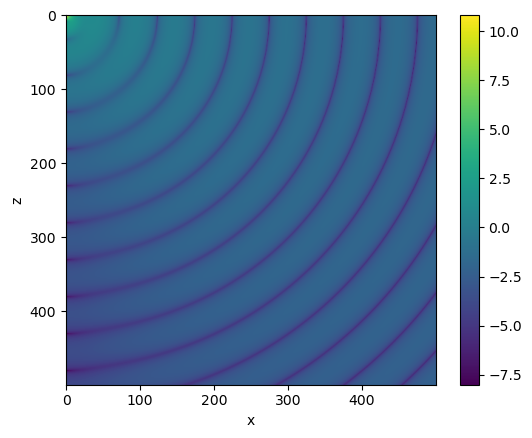

In [191]:
plt.imshow(np.log(graph.T))
plt.colorbar()
plt.xlabel("x")
plt.ylabel("z")

In [94]:
M = 20
div = 10
# distance between each simulation point
d = 300*10**(-9)
lamba = 689*10**(-9)
k_dir = np.array([0,0])
k0 = 2*np.pi/lamba
E0 = 1
positiony = np.arange(-M,M+1) * d
positionz = np.arange(-M,M+1) * d
Y,Z = np.meshgrid(positiony,positionz)

In [411]:
SLMphase = np.zeros([2*M+1,2*M+1])
# SLMphase = np.random.random([2*M+1,2*M+1])*np.pi*2

In [278]:
for i in range(2*M+1):
    if i % 2 == 0:
        SLMphase[i] = 3.14

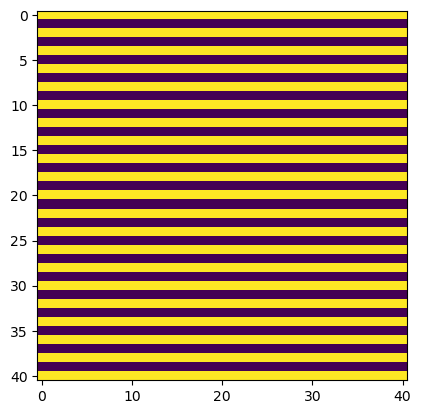

In [265]:
plt.imshow(SLMphase)

In [412]:
# initial surface for diffraction and interference
init = np.zeros([2*M+1,2*M+1],complex)
for i in range(2*M+1):
    for j in range(2*M+1):
        t = (k0*k_dir[0] * d * i + k0*k_dir[1] * d * j)
        init[i,j] = E0 * np.e**((0+1j)*t)

In [280]:
observation = 10**(-3)

In [413]:
sim_y = 100
sim_z = 100
sim_dy = 2000*10**(-9)
sim_dz = 2000*10**(-9)
deltay = 0
deltaz = 0

gridy = np.arange(-sim_y,sim_y+1)
gridz = np.arange(-sim_z,sim_z+1)
y = gridy * sim_dy + deltay
z = gridz * sim_dz + deltaz
result3 = np.zeros([sim_y*2+1,sim_y*2+1],complex)

In [414]:
for i in range(sim_y*2+1):
    if i % 10 == 0:
        print(i)
    for j in range(sim_y*2+1):
        r = ((Y-y[i])**2 + (Z-z[j])**2 + observation**2)**0.5
        phase = (k0*r + SLMphase) * (0+1j)
        decayfactor = (observation/r)
        result3[i,j] = np.sum(decayfactor * init * np.e**phase)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


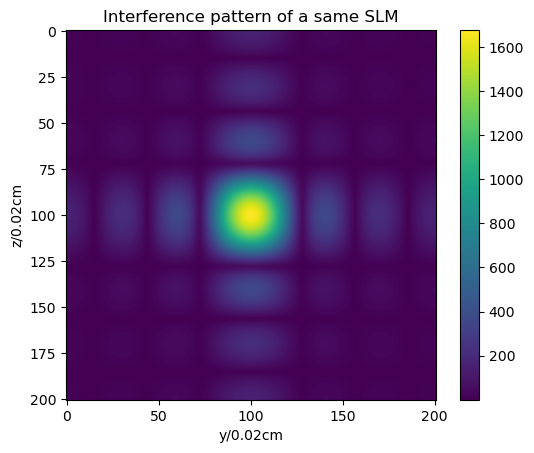

In [522]:
plt.imshow(np.abs(result3))
plt.colorbar()
plt.xlabel("y/0.02cm")
plt.ylabel("z/0.02cm")
plt.title("Interference pattern of a same SLM")
plt.savefig("SLMinterference.png",dpi=500)

In [1]:
"improve this code to support dyadic green function"

'improve this code to support dyadic green function'

In [189]:
def dyadic_tensor_calc_single(x,y,z,k,p):
    r = np.sqrt(x**2+y**2+z**2)
    a = np.e**((0+1j)*k*r)*k**2/(4*np.pi*8.854*10**(-12)*r)
    scalarcoeff = 1 + (0+1j)/(k*r) - 1/(k*r)**2
    tensorcoeff = -1 - 3/(k*r) + 3/(k*r)**2
    vec = np.asarray([x,y,z])/r
    tensor = (np.outer(vec,vec)*tensorcoeff + np.identity(3)*scalarcoeff) * a
    return np.dot(tensor,p)

In [451]:
p = np.array([0.e+00, 0.e+00, 1e-30])

In [450]:
dyadic_tensor_calc_single(lamba*0.5,0,0,k0,p)

array([  0.        +0.j        ,   0.        +0.j        ,
       -15.59829669-5.52487936j])

In [89]:
"near field green function plotting"

'near field green function plotting'

/var/folders/mk/2r6tg7fn01342s61sqx10ydr0000gn/T/ipykernel_46266/3734640691.py:9: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(graph.T))


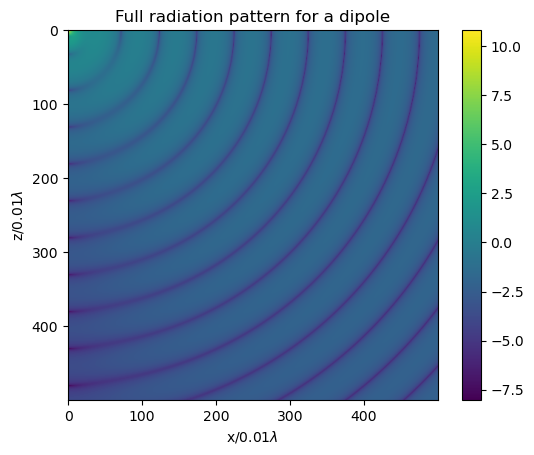

In [453]:
for i in range(500):
    for j in range(500):
        if i == 0 and j == 0:
            graph[i,j] = 0
            continue
        x = (i) * lamba/100
        z = (j) * lamba/100
        graph[i,j] = np.linalg.norm(np.real(dyadic_tensor_calc_single(x,0,z,k0,p)))
plt.imshow(np.log(graph.T))
plt.colorbar()
plt.xlabel("x/0.01$\lambda$")
plt.ylabel("z/0.01$\lambda$")
plt.title("Full radiation pattern for a dipole")
plt.savefig("Full_radiation.png",dpi=500)

In [316]:
"you can see that the green function looks a bit atypical in the very near location with d <~ lambda. We can actually further test it"

'you can see that the green function looks a bit atypical in the very near location with d <~ lambda. We can actually further test it'

In [267]:
result1 = np.zeros(9999)

In [465]:
for i in range(9999):
    result1[i] = -np.real(dyadic_tensor_calc_single((i+1)*0.01*lamba,0,0,k0,p))[2]

'for a z-direction oscillating dipole, we consider the Ez at different x direction. We have normalized the decay factor'

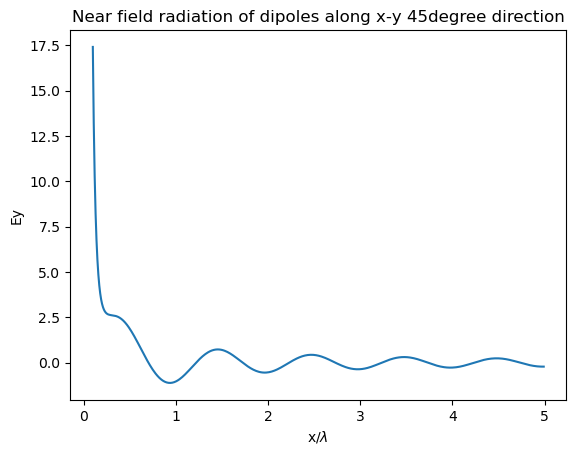

In [466]:
plt.plot(np.arange(10,500)/100,result1[10:500])
plt.title("Near field radiation of dipoles along x-y 45degree direction")
plt.xlabel("x/$\lambda$")
plt.ylabel("Ey")
plt.savefig("1Dnearfield.png",dpi=500)
"for a z-direction oscillating dipole, we consider the Ez at different x direction. We have normalized the decay factor"

In [311]:
"you can see that the green function looks a bit atypical in the very near location with d <~ lambda"

'you can see that the green function looks a bit atypical in the very near location with d <~ lambda'

In [515]:
sim_y = 100
sim_z = 100
sim_dy = 200000*10**(-9)
sim_dz = 200000*10**(-9)
deltay = 0
deltaz = 0

gridy = np.arange(-sim_y,sim_y+1)
gridz = np.arange(-sim_z,sim_z+1)
y = gridy * sim_dy + deltay
z = gridz * sim_dz + deltaz
resultprobe = np.zeros([sim_y*2+1,sim_z*2+1],complex)
observation = 0.1

In [509]:
# define the position of atoms: from number -M to M, each of them has a distance of d. 
# The wavelenegth of each atom is lamba
M = 20
# distance between each simulation point
d = 300*10**(-9)
lamba = 689*10**(-9)
k_dir = np.array([0,0])
k0 = 2*np.pi/lamba
E0 = 1
positiony = np.arange(-M,M+1) * d
positionz = np.arange(-M,M+1) * d
Y,Z = np.meshgrid(positiony,positionz)
X = np.zeros((2*M+1,2*M+1))
# different atom has different polarization
P = np.zeros((3,2*M+1,2*M+1))
for i in range(2*M+1):
    for j in range(2*M+1):
        P[:,i,j] = [0,0,10**(-30)]

Bigidentity = np.zeros((3,3,2*M+1,2*M+1))
for i in range(2*M+1):
    for j in range(2*M+1):
        Bigidentity[:,:,i,j] = np.identity(3)

In [355]:
def atom_mirror_radiation(x,y,z):
    distanceX = x-X
    distanceY = y-Y
    distanceZ = z-Z
    return dyadic_tensor_calc(distanceX,distanceY,distanceZ,k0,P)

In [502]:
result = np.zeros((9999,20))

In [510]:
for j in np.arange(1,10000):
    result[j-1,2] = np.linalg.norm(atom_mirror_radiation(j*lamba*0.01,0,0))

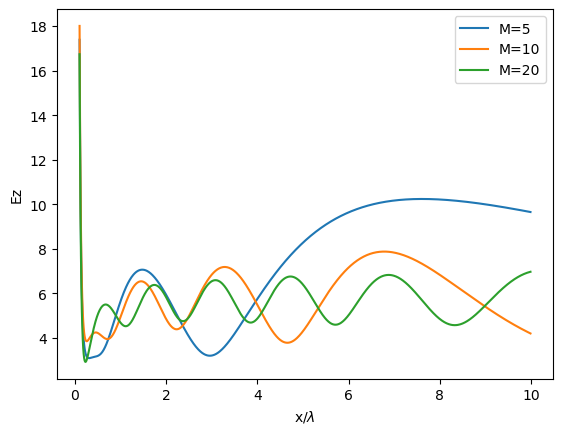

In [514]:
plt.plot(np.arange(10,1000)/100,result[10:1000,0],label="M=5")
plt.plot(np.arange(10,1000)/100,result[10:1000,1],label="M=10")
plt.plot(np.arange(10,1000)/100,result[10:1000,2],label="M=20")
plt.legend()
plt.xlabel("x/$\lambda$")
plt.ylabel("Ez")
plt.savefig("ArrayStandard_10.png",dpi=500)
# plt.plot(result[10:1000,3])
# plt.plot(result[10:300,4])
# plt.plot(result[1:1000,5])

In [516]:
for i in range(sim_y*2+1):
    if i % 10 == 0:
        print(i)
    for j in range(sim_z*2+1):
        resultprobe[i,j] = np.linalg.norm(atom_mirror_radiation(observation,y[i],z[j]))

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


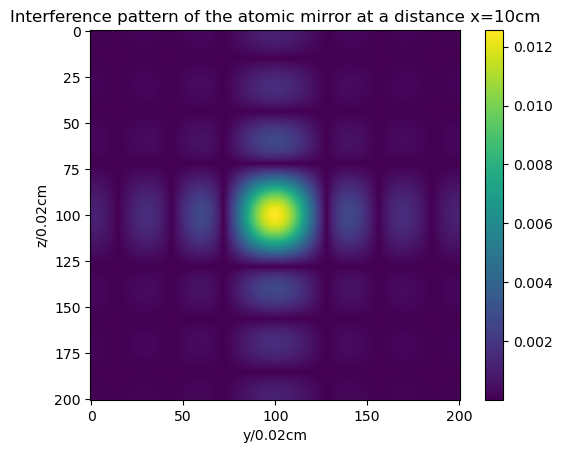

In [523]:
plt.imshow(np.abs(resultprobe))
plt.colorbar()
plt.xlabel("y/0.02cm")
plt.ylabel("z/0.02cm")
plt.title("Interference pattern of the atomic mirror at a distance x=10cm")
plt.savefig("simSLMinterference.png",dpi=500)


In [ ]:
"The propagation part of the code is finished. Now it's time to solve how the dipoles oscillates with the existence of atomic interaction"

In [ ]:
"we assume some physical value"

In [ ]:
deg = 5.29*10**(-11)
e = 1.6*10**(-19)

In [437]:
GTransfer = np.zeros((2*M+1,2*M+1,2*M+1,2*M+1))

In [438]:
detuning = np.zeros((2*M+1,2*M+1))
alpha0 = 

In [435]:
for i in range(2*M+1):
    for j in range(2*M+1):
        

20

In [525]:
(1.6*10**(-19)*5*10**(-11))**2/(1.05*10**(-34)*10**9)

6.095238095238096e-34